In [6]:
class Perceptron:
    def __init__(self, N):
        self.w = list()
        for i in range(N):
            self.w.append(0)

    # Метод для вычисления значения персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res += self.w[i] * x[i]
        return res

    # пороговая функция активации перспетрона
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        return -1

    # обучение на одном примере
    def learn(self, la, x, y):
        # обучаем только тогда, когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]

    # обучение по всем данным T - кортеж примеров
    def learning(self, la, T):
        for n in range(100):
            for t in T:
                self.learn(la, t[0], t[1])


perceptron = Perceptron(2)
la = 0.1

T = list()
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[5, 7], -1])

perceptron.learning(la, T)
print(perceptron.w)

print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))


[0.1, -0.1]
-1
1
1
-1


In [2]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feed_forward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)


weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feed_forward(x))

0.9990889488055994


In [8]:
import numpy as np


class OurNeuralNetwork:
    """
    Данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - выход (o1)
    Нейрона имеют идентичные веса и пороги
        - w = [0, 1]
        - b = 0
    """

    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feed_forward(self, x):
        out_h1 = self.h1.feed_forward(x)
        out_h2 = self.h2.feed_forward(x)

        # Входы для o1 - это выходы h1 и h2
        out_o1 = self.o1.feed_forward(np.array([out_h1, out_h2]))
        return out_o1


network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feed_forward(x))

0.7216325609518421


In [10]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[2], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)

    def feed_forward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def back_propagate(self):
        d_weights1 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid(self.output)))
        d_weights2 = np.dot(self.layer1.T, (
                    np.dot(2 * (self.y - self.output) * sigmoid(self.output), self.weights2.T) * sigmoid(self.layer1)))
        self.weights1  += d_weights1
        self.weights2 += d_weights2


In [6]:
import numpy as np
class OurNeuralNetwork:
    '''
    Данные нейросети:
        -два входа
        -два нейрона в скрытых слоях (h1, h2)
        -выход(о1)
    Нейроны имеют идентичные веса и пороги:
        -w = [0,1]
        -b = 0
    '''
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        # класс neuron из предыдущего раздела
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.h3 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feed_forward(self,x):
        out_h1 = self.h1.feed_forward(x)
        out_h2 = self.h2.feed_forward(x)
        out_h3 = self.h2.feed_forward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feed_forward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3,4])
print(network.feed_forward(x))

0.8151036049051821


In [7]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def ReLU(x):
    return np.maximum(0, x)


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feed_forward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return [sigmoid(total), tanh(total), ReLU(total)]


weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(*n.feed_forward(x))

0.9990889488055994 0.9999983369439447 7


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_wine



Dataset Sizes:  (178, 13) (178,)


In [42]:
iris = load_iris()
x_iris, y_iris = iris.data, iris.target
print("Dataset Sizes: ", x_iris.shape, y_iris.shape)


Dataset Sizes:  (150, 4) (150,)


In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, train_size=0.8, test_size=0.2, stratify=y_iris, random_state=123)

print("Train/Test Sizes: ", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Train/Test Sizes:  (120, 4) (30, 4) (120,) (30,)


In [44]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=123)

In [45]:
y_preds = mlp_classifier.predict(x_test)

print(y_preds[:15])
print(y_test[:15])

[1 0 2 2 0 0 2 2 2 0 0 1 2 1 2]
[1 0 2 2 0 0 2 1 2 0 0 1 2 1 2]


In [46]:
print("Test Accuracy: %.3f" % mlp_classifier.score(x_test, y_test))
print("Train Accuracy: %.3f" % mlp_classifier.score(x_train, y_train))

Test Accuracy: 0.933
Train Accuracy: 0.983


[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


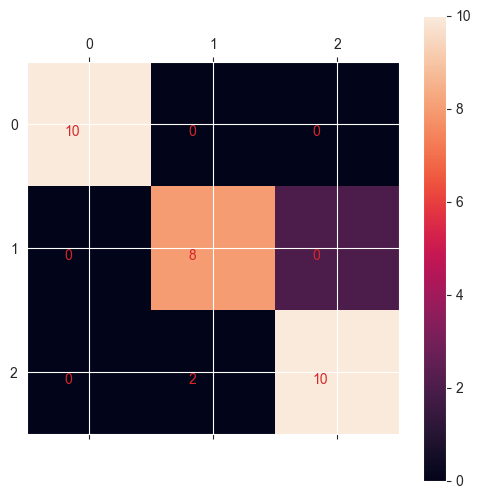

In [47]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_preds):
    conf_matrix = confusion_matrix(y_test, y_preds)
    print(conf_matrix)
    fig = plt.figure(figsize=(6, 6))
    plt.matshow(conf_matrix, fignum=1)
    plt.yticks(range(3), range(3))
    plt.xticks(range(3), range(3))
    plt.colorbar()
    for i in range(3):
        for j in range(3):
            plt.text(i-0.2, j+0.1, str(conf_matrix[i, j]), color='tab:red')
plot_confusion_matrix(y_test, mlp_classifier.predict(x_test))

In [48]:
# loss - возвращает убыток после завершения процесса обучения.
print("Loss: ", mlp_classifier.loss_)

# coets - возвращает массив длины n _layers-1, где каждый элемент
# представляет веса, связанные с уровнем і.
print("Number of Coefs: ", len(mlp_classifier.coefs_))

# intercepts_ - возвращает массив длины n layers-1, где каждый элемент представляет собой перехват, связанный с персептронами cлоя і.
print("Number of Intercepts: ", len(mlp_classifier.intercepts_))

# n iter_ — количество итераций, для которых выполнялась оценка.
print("Number of Iterations for Which Estimator Ran: ", mlp_classifier.n_iter_)

# out_activation_ - возвращает имя функции активации выходного слоя.
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

Loss:  0.2988789340197433
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Ran:  200
Name of Output Layer Activation Function:  softmax


In [53]:
wine = load_wine()
x_wine, y_wine = wine.data, wine.target
print("Dataset Sizes: ", x_wine.shape, y_wine.shape)


x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, train_size=0.8, test_size=0.2, stratify=y_wine, random_state=123)
print("Train/Test Sizes: ", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Dataset Sizes:  (178, 13) (178,)
Train/Test Sizes:  (142, 13) (36, 13) (142,) (36,)


In [54]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train, y_train)

MLPRegressor(random_state=123)

In [55]:
y_preds = mlp_regressor.predict(x_test)

print(y_preds[:15])
print(y_test[:15])

## Метод Score оценивает точность моделей классификации
print("Test R^2 Score : %.3f" % mlp_regressor.score(x_test, y_test))
print("Training R^2 Score : %.3f" % mlp_regressor.score(x_train, y_train))

[ 6.96820138 35.27468338  7.33310039 13.54625769 11.62114803 29.9522574
  6.64322426  2.304397   22.76407616 30.51909287 10.25751833  9.62449326
 27.10898388 29.4274912   9.63704215]
[1 0 1 2 2 0 1 1 1 0 1 1 0 0 2]
Test R^2 Score : -607.845
Training R^2 Score : -790.214


In [52]:
# loss - возвращает убыток после завершения процесса обучения.
print("Loss: ", mlp_regressor.loss_)

# coets - возвращает массив длины n _layers-1, где каждый элемент
# представляет веса, связанные с уровнем і.
print("Number of Coefs: ", len(mlp_regressor.coefs_))

# intercepts_ - возвращает массив длины n layers-1, где каждый элемент представляет собой перехват, связанный с персептронами cлоя і.
print("Number of Intercepts: ", len(mlp_regressor.intercepts_))

# n iter_ — количество итераций, для которых выполнялась оценка.
print("Number of Iterations for Which Estimator Ran: ", mlp_regressor.n_iter_)

# out_activation_ - возвращает имя функции активации выходного слоя.
print("Name of Output Layer Activation Function: ", mlp_regressor.out_activation_)

Loss:  312.44135838682905
Number of Coefs:  2
Number of Intercepts:  2
Number of Iterations for Which Estimator Ran:  20
Name of Output Layer Activation Function:  identity
